# Experimental Methods Exam January 2021

\- Gugliemo Grillo  
MAT. 223450

Zoom link: https://unitn.zoom.us/j/96470214715  
Meeting ID: 964 7021 4715  
Passcode: 278896

Email:
- [stefano.vitale@unitn.it](mailto:stefano.vitale@unitn.it)
- [eleonora.castelli@unitn.it](mailto:eleonora.castelli@unitn.it)

#### Question 1

The sources of noise, with their relative PSD are:

- The thermal noise of the resistor $R_p$: $S_{V,V}(\omega) = 2 k_b T_{th} R_p$
- The thermal noise of the resistor $R_f$: $S_{V,V}(\omega) = 2 k_b T_{th} R_f$
- The amplifier's noise sources $V_n$ and $I_n$

The capacitor isn't take in account as it's supposed to be ideal and with only an imaginary component. The resistances PSD are obtained through Nyquist formula. 

The amplifier's noise sources can be evaluated from the quantity given in the following way:

$$V_n(\omega) = k_b T_n(\omega) R_n(\omega) = k_b T_n \bigl(1+ \frac{f_0}{f}\bigr)R_n$$

$$I_n(\omega) = k_b T_n(\omega)/R_n(\omega) = k_b \frac{T_n}{R_n}\bigl(1+ \frac{f_0}{f} \bigr)$$

All the PSD are reported as double sided PSD. One can transform them into one side PSD with the relation $S^{\text{exp phy}}(\omega) = 2 S(\omega)$.

In [1]:
# packages used
import scipy.constants # https://docs.scipy.org/doc/scipy/reference/constants.html
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math


# Given constans
kb = scipy.constants.Boltzmann # J/K
Tnoise = 100 # K
Rnoise = 1.7e3 # Ohm
f0 = 100 # Hz

G = 10
Tth = 293 # K
C = 2.5e-12 #F
Rp = 10 # Ohm
Rf = 50e3 # Ohm
A = 0.7 # V^-1

Wt = 1.3e-6 # W
DeltaT = 60 # s

Fh = 500 # Hz

# Noise Temperature
Tn = lambda f: Tnoise*(1+f0/f)

# Show value
display(Math(r"k_b T_n R_n="+"{:.5} V".format(kb*Tnoise*Rnoise)))
display(Math(r"k_b \frac{T_n}{R_n}="+"{:.5}".format(kb*Tnoise/Rnoise )+r"\ \Omega^{-1}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

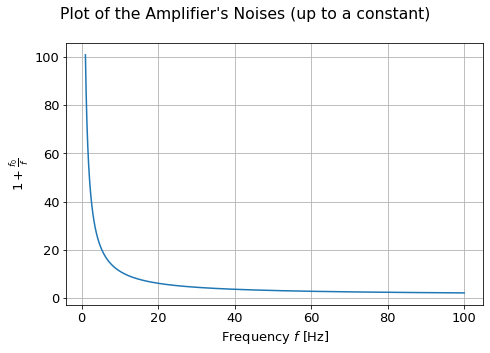

In [2]:
f = np.linspace(1, 100, int(1e6))
y = Tn(f)/Tnoise

plt.rcParams.update({'font.size': 13})

fig, axis = plt.subplots(1,1, figsize=(7, 5))
fig.suptitle("Plot of the Amplifier's Noises (up to a constant)")

axis.plot(f, y)
axis.set_xlabel("Frequency $f$ [Hz]")
axis.set_ylabel(r"$1+\frac{f_0}{f}$")
axis.grid(True, which="both")

plt.tight_layout()
plt.show()

#### Question 2

Regarding $R_p$:  
It's voltage PSD can be propagated at input by noticing that the capacitor transforms the input current into an input voltage via $V(\omega) = i \omega C I(\omega)$. Therefore $R_p$ contributes with a term:

$$S_{R_p}^{in}(\omega) = 2 k_b T_{th}R_p |\frac{1}{i \omega C}|^2$$

Regarding $R_f$:  
Its noise current $S_{R_f}(\omega) = 2 k_b \frac{T_{th}}{R_f}$ flows in the feedback branch of the feedback loop. The relation between the input current and the feedback current is

$$i_{fb} = - \frac{\beta G}{1+\beta G} i_e(\omega) \rightarrow \frac{i_e}{i_{fb}} = -\frac{1+\beta G}{\beta G} $$

with $\beta = R_f$ in our case. It's then possible to propagate the PSD and obtain:

$$S_{R_r}(\omega) =  |\frac{1+R_f G}{R_f G}|^2\ 2 k_b \frac{T_{th}}{R_f} = \frac{2 k_b T_{th}}{R_f} \frac{(1+R_f G)^2}{R_f^2 G^2}$$

This value needs to be propagated at input by sending it through the resistor to get the Voltage PSD and then through the capacitor:
$$S_{R_r}^{in}(\omega) = \frac{2 k_b T_{th}}{R_f} \frac{(1+R_f G)^2}{R_f^2 G^2}\ |\frac{R_p}{i\omega C}|^2$$


Regarding the Amplifier's noise sources:  
$V_n$ is already a voltage PSD while $I_n$ needs to pass through $R_f$. After that both need to be propagated through the capacitor:

$$S_{I_n}^{in}(\omega) = k_b \frac{T_n}{R_n}\bigl(1+ \frac{f_0}{f} \bigr) |\frac{R_p}{i\omega C}|^2$$

$$S_{V_n}^{in}(\omega) = k_b T_n \bigl(1+ \frac{f_0}{f}\bigr)R_n |\frac{1}{i\omega C}|^2$$

To sum up, the total input PSD is

$$S_{R_p}^{in}(\omega) + S_{R_r}^{in}(\omega) + S_{I_n}^{in}(\omega) + S_{V_n}^{in}(\omega) =\\
2 k_b\frac{T_{th}R_p}{\omega^2 C^2} +
\frac{2 k_b T_{th}}{R_f} \frac{(1+R_f G)^2}{R_f^2 G^2}\ \frac{R_p^2}{\omega^2 C^2}+
\frac{k_b T_n}{R_n}\bigl(1+ \frac{f_0}{f} \bigr)\frac{R_p^2}{\omega^2 C^2} +
\bigl(1+ \frac{f_0}{f}\bigr)\frac{ k_b T_n R_n}{\omega^2 C^2} = \\
\bigg[R_p + \frac{(1+R_f G)^2}{R_f^2 G^2}\ \frac{R_p^2}{R_f}+
\frac{(R_p^2 + R_n^2)}{2 R_n} \bigl(1+ \frac{2\pi f_0}{\omega}\bigr) \bigg] \frac{2 k_b T_{th}}{\omega^2 C^2} = S_{tot}^{in}(\omega)$$

The PSD of an equivalent input optical power W can be evaluated by dividing everything by $A^2$

$$S_{P,P}(\omega) = \bigg[R_p + \frac{(1+R_f G)^2}{R_f^2 G^2}\ \frac{R_p^2}{R_f}+
\frac{(R_p^2 + R_n^2)}{2 R_n} \bigl(1+ \frac{2\pi f_0}{\omega}\bigr) \bigg] \frac{2 k_b T_{th}}{\omega^2 C^2 A^2}$$


It's possible to notice that inside the square brackets there is the sum of somethings that have the units of $\Omega$ this implies that probably no math mistake was made.

The total PSD can be rewritten as
$$S_{P,P}(\omega) = \bigg[R_1 + R_2 \bigl(1+ \frac{2\pi f_0}{\omega}\bigr) \bigg] \frac{R_3}{\omega^2}$$

with: $R_1 = R_p + \frac{(1+R_f G)^2}{R_f^2 G^2}\ \frac{R_p^2}{R_f}$; $R_2 = \frac{(R_p^2 + R_n^2)}{2 R_n}$; $R_3 = \frac{2 k_b T_{th}}{C^2 A^2}$

Where the notation $R_3$ was chosen despite not being expressed in $\Omega$ as $R_1$ and $R_2$.

In [13]:
R1 = Rp + (Rp**2 / Rf)*((1+Rf*G)/(Rf*G))**2
R2 = (Rp**2 + Rnoise**2)/(2*Rnoise)
R3 = (2*kb*Tth)/(C**2 * A**2)
display(Math('R_1={:.3f} \Omega'.format(R1)) )
display(Math('R_2={:.3f} \Omega'.format(R2)) )
display(Math('R_3={:.3f}'.format(R3)+r"\ \frac{J V^2}{F^2}") )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

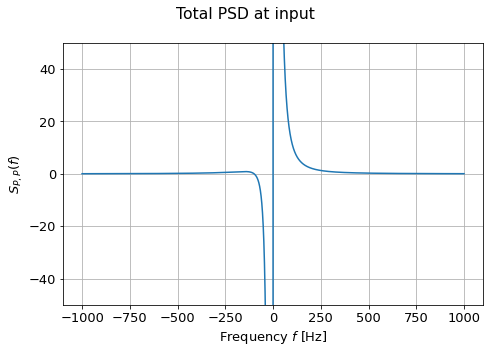

In [4]:
def PSDtot(f):
    Reqiv =  R1+ R2* (1+f0/f)  
    return Reqiv*R3/np.power(2*np.pi*f, 2)

f = np.linspace(-(1e3), 1e3, int(1e6))
PSD = PSDtot(f)

# Bode plot
plt.rcParams.update({'font.size': 13})

fig, axis = plt.subplots(1,1, figsize=(7, 5))
fig.suptitle("Total PSD at input")

axis.plot(f, PSD)
#axis.set_yscale('log')
axis.set_xlabel("Frequency $f$ [Hz]")
axis.set_ylabel(r"$S_{P,P}(f)$")
axis.grid(True, which="both")
axis.set_ylim([-50, 50])

plt.tight_layout()
plt.show()

#### Question 3

This is a Wiener's problem. The signal has the form $s(t)= M f(t)=M \bigl( \Theta(t) - \Theta(t-\Delta T) \bigr)$ with $M=W_t\ 10^{-0.4 m}$. Wiener's theory states that the minimum error is equal to:

$$ \sigma_{M}^2 = \frac{1}{\frac{1}{2\pi}\int_{-\infty}^{+\infty} \frac{|f(\omega)|^2}{S(\omega)} d\omega}$$
Where $f(\omega)$ is the Fourier transform of the signal's template:

$$f(\omega) = \mathcal{FT}\bigl[ \bigl( \Theta(t) - \Theta(t-\Delta T) \bigr) \bigr](\omega) = \frac{i(e^{-i\Delta T \omega}-1)}{\omega}$$

The $\mathcal{FT}$ was evaluated with [WolframAlpha](https://www.wolframalpha.com/input/?i=Fourier+transform+%28Theta%28t%29-Theta%28t-A%29+%29) (normalization factor=1, oscillator factor=-1 to respect the convention used in the lectures). This is just an other form of the translated sinc.

One can write the signal to noise ratio as

$$ SNR(\omega) = \frac{|f(\omega)|^2}{S(\omega)} = \frac{|i(e^{-i\Delta T \omega}-1)|}{R_3} \frac{\omega}{(R_1 + R_2)\omega + 2\pi f_0 R_2} = \frac{2-2 cos(\Delta T \omega)}{R_3} \frac{\omega}{(R_1 + R_2)\omega + 2\pi f_0 R_2}$$


The integral can be evaluated numerically:

In [5]:
def template(omega):
    return 1j*(np.exp(-1j*DeltaT*omega) -1)/omega

def integrand(omega):
    f = omega / (2*np.pi)
    return np.power( np.abs(template(omega)),2 )/ PSDtot(f)

I = quad(integrand, -np.inf, np.inf, limit=100)
display(Math(r'$\text{Value of the integral: }$'+'I={:.9f}'.format(I[0])+
             r'$\text{   Absolute error: }'+'{:.2}'.format(I[1]) ))
        
sigma2 = 2*np.pi/I[0]
display(Math('\sigma^2_M={:.3f}'.format(sigma2)) )

<ipython-input-5-fec884e921a5>:8: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I = quad(integrand, -np.inf, np.inf, limit=100)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

This integral does not converges due to the discontinuity at $\omega = -\frac{2\pi f_0 R_2}{R_1 + R_2}$. A way to solve this problem may be to use the "Data whitening" and use the Wiener's theory for finite interval and white noise. 

In [6]:
display(Math(r'-\frac{2\pi f_0 R_2}{R_1 + R_2}='+'{:.3f}'.format(-2*np.pi*f0*R2/(R1+R2)) ))

<IPython.core.display.Math object>

### Question 4

The chopper multiplies the signal by a square wave $\frac{1+Sign( sin(2\pi f_h t))}{2}$. As $\omega_0 = 2\pi f_h\simeq 3000 Hz$ the signal can be expanded as a Taylor series so that:

$$1+Sign( sin(|omega_0 t)) \simeq \frac{1}{2} \bigl[ 1+\frac{4}{\pi} sin(\omega_0 t)+...\bigr] \rightarrow \frac{1+Sign( sin(\omega_0 t) )}{2} \simeq \frac{1}{4}+\frac{sin(\omega_0 t)}{\pi} $$

The new signal template is therefore
$$ f(t) = \frac{1}{4}+\frac{sin(\omega_0 t)}{\pi}$$

$$ f(\omega) = \frac{\pi}{2}\delta(\omega) - i\bigl[ \delta(\omega-\omega_0) - \delta(\omega+\omega_0) \bigr]$$

By applying Wiener's theory:

$$ \sigma_{M}^2 = \bigg[ \frac{1}{2\pi}\int_{-\infty}^{+\infty} \frac{|f(\omega)|^2}{S(\omega)} d\omega \bigg]^{-1} = \bigg[ \frac{1}{2\pi}\int_{-\infty}^{+\infty} \frac{|\frac{\pi}{2}\delta(\omega) - i\bigl[ \delta(\omega-\omega_0) - \delta(\omega+\omega_0) \bigr]|^2}{S(\omega)} d\omega \bigg]^{-1}$$

Which can be separated in the sum of three contributes at the frequencies $0, \omega_0, -\omega_0$.

$$ \sigma_{M}^2 = 2\pi \bigg[ \frac{\pi^2}{4 S(0)}+ \frac{1}{S(\omega_0)} + \frac{1}{S(-\omega_0)}\bigg]^{-1}$$


The minimum detectable power (squared) is therefore:

In [7]:
# PSDtot(1e-100) instead of PSDtot(0) is used to avoid division by zero.
#For phyton that's an error, but in reality the two omega would cancel with on an other.
sigma2 = 2*np.pi/(np.pi**2/(4*PSDtot(1e-100)) + 1/PSDtot(Fh) + 1/(PSDtot(-Fh)) )

display(Math('\sigma^2_W={:.9f}'.format(sigma2)) ) 

<IPython.core.display.Math object>

To evaluate the maximum detectable magnitude is sufficient to invert the relation $W = W_t 10^{-0.4 m} \rightarrow m=-2.5\ Log(\frac{\sigma_{W}}{W_t})$ 

In [8]:
display(Math('m={:.2f}'.format(-2.5*np.log(sigma2/Wt))) ) 

<IPython.core.display.Math object>